## Universidad Politécnica Salesiana
## Carrera de Computación

## Visión por Computador

### Practica 0: Cálculo de entropía

### Autor: Diego Tapia

### Fecha: 15 de abril del 2024

**Entropía**

La entropía en imágenes, ya sea en escala de grises o a color, es una medida de la incertidumbre o el desorden en la distribución de los niveles de intensidad de los píxeles en la imagen.

En una imagen en escala de grises, la entropía mide qué tan uniformemente distribuidos están los tonos de gris en toda la imagen. Una imagen con baja entropía tendría una distribución de tonos de gris más uniforme, lo que significa que la mayoría de los píxeles tendrían valores de intensidad similares. Por otro lado, una imagen con alta entropía tendría una distribución menos uniforme, con una mayor variación en los niveles de gris entre los píxeles.

En imágenes a color, la entropía se refiere a la distribución de los componentes de color (rojo, verde y azul en el modelo RGB, por ejemplo). Una imagen con baja entropía tendría una distribución de colores más uniforme, con una prevalencia de ciertos colores o combinaciones de colores. Una imagen con alta entropía tendría una distribución más variada y menos predecible de colores en toda la imagen.


In [3]:
import os, time, psutil
from skimage import io, color
import skimage.measure as ski
import matplotlib.pyplot as plt
import platform
from matplotlib.backends.backend_pdf import PdfPages


In [6]:

# ruta relativa de las imagenes 
# las imagenes deben ir en la careta images en el mismo directorio del script
carpeta_imagenes = './images'

# calculo del tiempo total
tiempo_inicio = time.time()

# listas para guardar los tiempos de cálculo de la entropía de cada imagen
tiempos_color = []
tiempos_gris = []

# lista para  uso de RAM, para calcular el uso medio
memoria_ram = []

# lista para uso de CPU
uso_cpu = []

# listas para guardar la entropia a color y escala de grises, para el histograma y el boxplot
lista_entropias_color = []
lista_entropias_gris = []

# se obtiene los nombres de las imagenes en la carpeta
lista_imagenes = os.listdir(carpeta_imagenes)

# calculo de entropia de cada imagen
for nombre_imagen in lista_imagenes:
    
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
    
    imagen = io.imread(ruta_imagen)

    # verifica si la imagen tiene 4 canales y la convierte a 3 canales si es necesario
    if len(imagen.shape) == 3 and imagen.shape[2] == 4:
        imagen = imagen[:, :, :3]
    
    # cálculo de la entropía en escala de grises

    inicio_entropia_gris = time.time()
    imagen_gris = color.rgb2gray(imagen)
    entropia_gris = ski.shannon_entropy(imagen_gris)
    fin_entropia_gris = time.time()
    tiempos_gris.append(fin_entropia_gris - inicio_entropia_gris)

    # se agrega la entropia gris a la lista
    lista_entropias_gris.append(entropia_gris)
    
    # cálculo de la entropía a color

    inicio_entropia_color = time.time()
    entropia_color = ski.shannon_entropy(imagen)
    fin_entropia_color = time.time()
    tiempos_color.append(fin_entropia_color - inicio_entropia_color)

    # se agrega la entropia color a la lista
    lista_entropias_color.append(entropia_color)

    # Imprimir la entropía de la imagen
    print(f"Entropía gris de {nombre_imagen}: {entropia_gris}")
    print(f"Entropía color de {nombre_imagen}: {entropia_color}")

    # guarda la memoria ram usada pare cada imagen
    memoria_ram.append(psutil.virtual_memory().used)
    # guarda el uso del cpu
    uso_cpu.append(psutil.cpu_percent())

# cálculo del tiempo de ejecución total
tiempo_final = time.time()
tiempo_total = tiempo_final - tiempo_inicio
tiempo_total =  round(tiempo_total, 4)
uso_cpu_promedio = round((sum(uso_cpu) / len(uso_cpu)), 4)
memoria_usada_promedio_mb = round((sum(memoria_ram) / len(memoria_ram)) / (1024**2), 4)
memoria_ram_mb = [ram / (1024**2) for ram in memoria_ram]
# Imprimir resultados
so_utilizado = platform.system()
tiempo_promedio_entropia_color =round( (sum(tiempos_color) / len(tiempos_color)), 4)
tiempo_promedio_entropia_grises = round((sum(tiempos_gris) / len(tiempos_gris)), 4)
print("\n")
print(f"Sistema operativo utilizado: {so_utilizado}")
print(f"Tiempo total de ejecución: {tiempo_total} segundos")
print(f"Tiempo promedio calculo entropia imagen a color {tiempo_promedio_entropia_color} segundos")
print(f"Tiempo promedio calculo entropia imagen a escala de grises {tiempo_promedio_entropia_grises} segundos")
print(f"Uso de CPU promedio: {uso_cpu_promedio} %")
print(f"Uso de RAM promedio: {memoria_usada_promedio_mb} Megabytes")



Entropía gris de 1.jpg: 11.3122831126917
Entropía color de 1.jpg: 6.755118491669408
Entropía gris de 10.jpg: 12.067161039269212
Entropía color de 10.jpg: 6.964056668025459
Entropía gris de 100.jpg: 13.653600969335402
Entropía color de 100.jpg: 7.354397026911498
Entropía gris de 1000.jpg: 15.149275053598451
Entropía color de 1000.jpg: 7.353923972662908
Entropía gris de 1001.jpg: 10.504973910677181
Entropía color de 1001.jpg: 6.709589008278432
Entropía gris de 1002.jpg: 11.868638881379864
Entropía color de 1002.jpg: 7.480167617628098
Entropía gris de 1003.jpg: 13.368363421435248
Entropía color de 1003.jpg: 7.513130495395719
Entropía gris de 1004.jpg: 9.247191170151964
Entropía color de 1004.jpg: 5.966348534967746
Entropía gris de 1005.jpg: 12.865467960082315
Entropía color de 1005.jpg: 7.039393015448684
Entropía gris de 1006.jpg: 13.396665244787531
Entropía color de 1006.jpg: 7.608552104097567
Entropía gris de 1007.jpg: 13.137540600828718
Entropía color de 1007.jpg: 7.5734625715409125
En

### Graficos


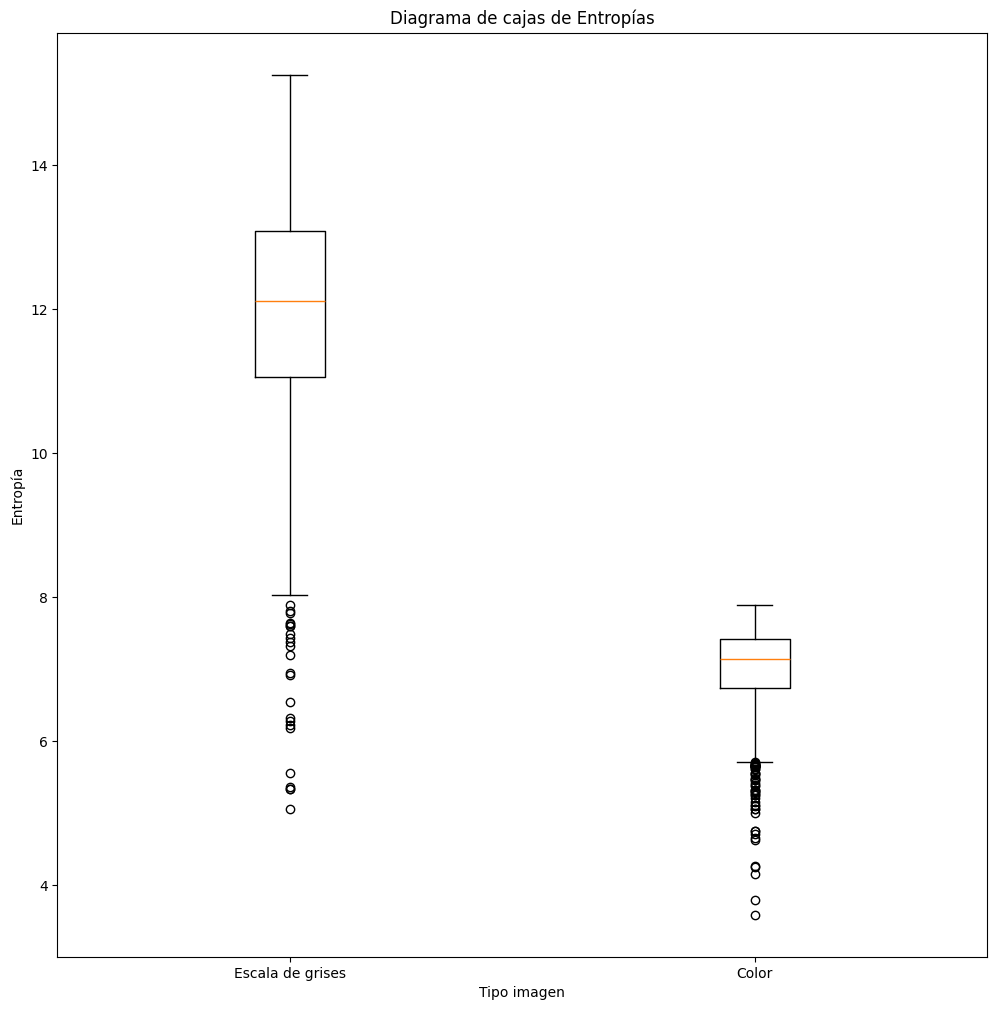

In [7]:
# creacion boxplot
 # boxplots entropias
plt.figure(figsize=(12, 12))  
plt.boxplot([lista_entropias_gris, lista_entropias_color], labels=['Escala de grises', 'Color'])
plt.xlabel('Tipo imagen')
plt.ylabel('Entropía')
plt.title('Diagrama de cajas de Entropías')

plt.show()

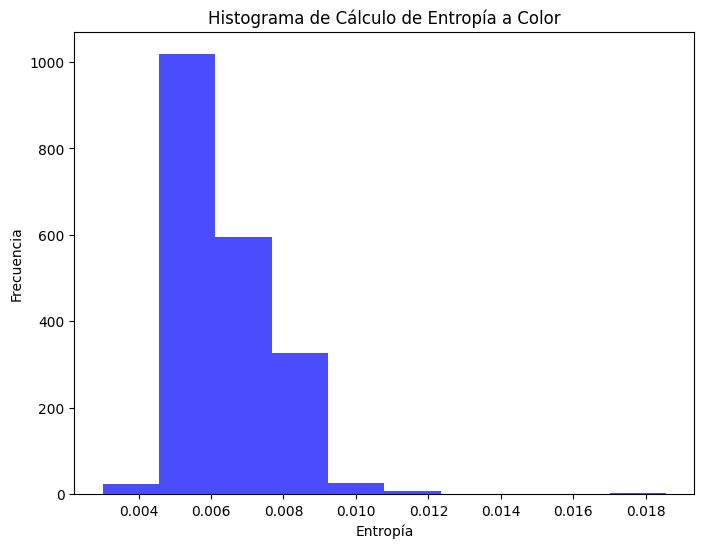

In [8]:
# histograma de cálculo de entropía a color
plt.figure(figsize=(8,6))
plt.hist(tiempos_color, bins=10, color='blue', alpha=0.7)
plt.xlabel('Entropía')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cálculo de Entropía a Color')
plt.show()

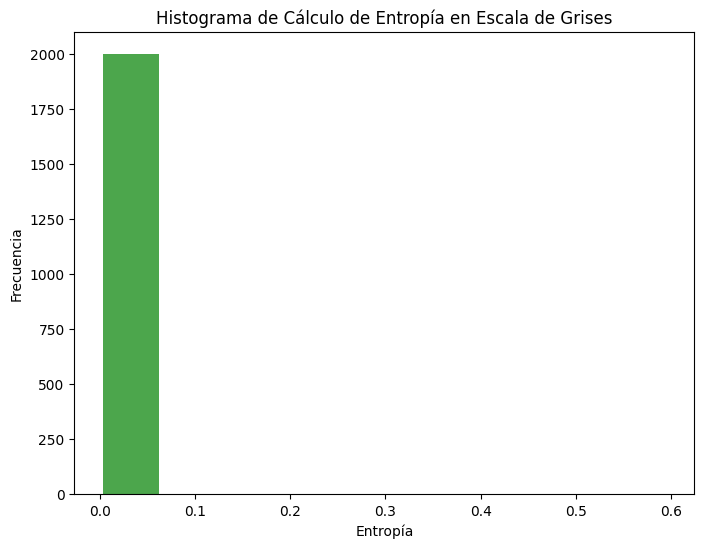

In [9]:
# histograma  de cálculo de entropía en escala de grises
plt.figure(figsize=(8,6))
plt.hist(tiempos_gris, bins=10, color='green', alpha=0.7)
plt.xlabel('Entropía')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cálculo de Entropía en Escala de Grises')
plt.show()

### Graficos de Tiempo, Uso de % CPU y RAM (MB)

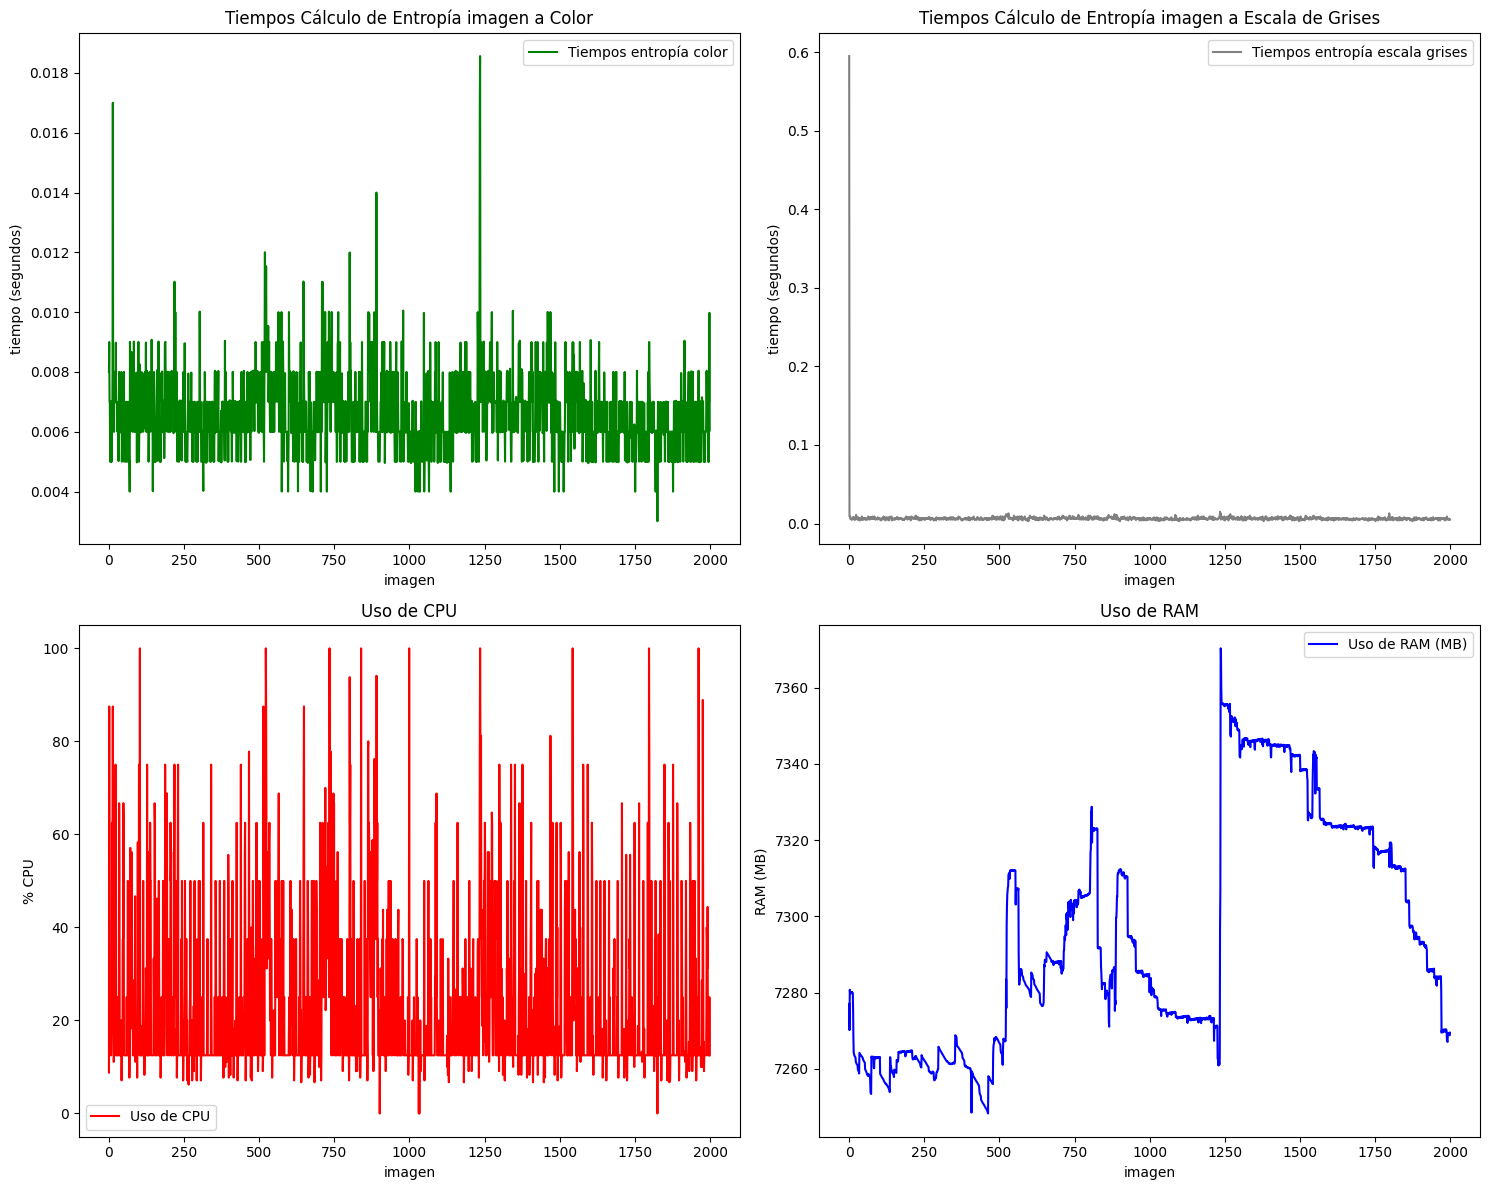

In [11]:
# graficos metricas

plt.figure(figsize=(15,12))

    # Gráfico 1: Tiempos de cálculo de entropía imagen a color
plt.subplot(2, 2, 1)
plt.plot(range(len(tiempos_color)), tiempos_color, label='Tiempos entropía color', color='green')
plt.xlabel('imagen')
plt.ylabel('tiempo (segundos)')
plt.title('Tiempos Cálculo de Entropía imagen a Color')
plt.legend()
    

    # Gráfico 2: Tiempos de cálculo de entropía imagen a escala de grises
plt.subplot(2, 2, 2)
plt.plot(range(len(tiempos_gris)), tiempos_gris, label='Tiempos entropía escala grises', color='gray')
plt.xlabel('imagen')
plt.ylabel('tiempo (segundos)')
plt.title('Tiempos Cálculo de Entropía imagen a Escala de Grises')
plt.legend()
    

    # Gráfico 3: Uso de CPU
plt.subplot(2, 2, 3)
plt.plot(range(len(uso_cpu)), uso_cpu, label='Uso de CPU', color='red')
plt.xlabel('imagen')
plt.ylabel('% CPU')
plt.title('Uso de CPU')
plt.legend()
    

    # Gráfico 4: Uso de RAM
plt.subplot(2, 2, 4)
plt.plot(range(len(memoria_ram_mb)), memoria_ram_mb, label='Uso de RAM (MB)', color='blue')
plt.xlabel('imagen')
plt.ylabel('RAM (MB)')
plt.title('Uso de RAM')
plt.legend()
    

    # Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

## Ejecucion en distintos Sistemas Operativos

Se ejecuta el script en dos sistemas operativos:

* Zorin OS (Linux)
* Windows 10

### Ejecucion en  linux

#### Información de la PC:
![linuxinfo](https://raw.githubusercontent.com/juandtap/vision_practica0/master/linux2.png)

#### Resultados de la ejecución:
![linux1](https://raw.githubusercontent.com/juandtap/vision_practica0/master/linux1.png)

### Ejecucion en  Windows

#### Información de la PC:
![wininfo](https://raw.githubusercontent.com/juandtap/vision_practica0/master/windows2.png)

#### Resultados de la ejecución:
![winresult](https://raw.githubusercontent.com/juandtap/vision_practica0/master/windows1.png)

## Conclusiones y observaciones

La entropía en imágenes nos ayuda a entender qué tan variada o uniformemente distribuidos están los tonos de gris o los colores en la imagen, lo que puede ser útil en varias aplicaciones, como compresión de imágenes, análisis de texturas o detección de bordes.

Como se pude observar en sistemas operativos basados en Linux, el tiempo de ejecucion y uso de recursos fue menor en comparacion con Windows